# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import shutil

# 2. Keypoint using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic  #Holistic model
mp_drawing = mp.solutions.drawing_utils  #Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read live feed from webcam
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw Landmarks
        draw_landmarks(image, results)

        # Show on screen
        cv2.imshow("OpenCV-WebcamFeed", image)

        # Breaking loop to exit by pressing 'q' on keyboard
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

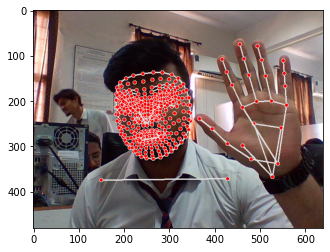

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [13]:
len(results.left_hand_landmarks.landmark)

21

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 0.39222375,  0.52962363, -0.66464061, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.39222375,  0.52962363, -0.66464061, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [22]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'victory', 'happy_thumbsup'])

# Thirty videos worth of data
no_sequences = 10

# Videos are going to be 10 frames in length
sequence_length = 10

# Folder start
start_folder = 0

In [23]:
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [24]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'hello': 0, 'victory': 1, 'happy_thumbsup': 2}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [29]:
np.array(sequences).shape

(30, 10, 1662)

In [30]:
np.array(labels).shape

(30,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(30, 10, 1662)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [35]:
y_test.shape

(2, 3)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [37]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [38]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 1.0966 - categorical_accuracy: 0.6071
Epoch 2/2000
1/1 [==============================] - 0s 131ms/step - loss: 1.1061 - categorical_accuracy: 0.3214
Epoch 3/2000
1/1 [==============================] - 0s 21ms/step - loss: 1.1021 - categorical_accuracy: 0.3214
Epoch 4/2000
1/1 [==============================] - 0s 22ms/step - loss: 1.0957 - categorical_accuracy: 0.3214
Epoch 5/2000
1/1 [==============================] - 0s 20ms/step - loss: 1.0989 - categorical_accuracy: 0.3214
Epoch 6/2000
1/1 [==============================] - 0s 23ms/step - loss: 1.0849 - categorical_accuracy: 0.3929
Epoch 7/2000
1/1 [==============================] - 0s 21ms/step - loss: 1.1627 - categorical_accuracy: 0.3214
Epoch 8/2000
1/1 [==============================] - 0s 22ms/step - loss: 1.1650 - categorical_accuracy: 0.3571
Epoch 9/2000
1/1 [==============================] - 0s 21ms/step - loss: 1.1156 - categorical_accuracy: 0.3571
Ep

1/1 [==============================] - 0s 20ms/step - loss: 1.3976 - categorical_accuracy: 0.6786
Epoch 75/2000
1/1 [==============================] - 0s 20ms/step - loss: 1.8660 - categorical_accuracy: 0.3571
Epoch 76/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.9084 - categorical_accuracy: 0.4286
Epoch 77/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.7936 - categorical_accuracy: 0.7143
Epoch 78/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.9301 - categorical_accuracy: 0.6786
Epoch 79/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.9874 - categorical_accuracy: 0.7500
Epoch 80/2000
1/1 [==============================] - 0s 23ms/step - loss: 1.0102 - categorical_accuracy: 0.7500
Epoch 81/2000
1/1 [==============================] - 0s 20ms/step - loss: 1.0266 - categorical_accuracy: 0.7143
Epoch 82/2000
1/1 [==============================] - 0s 22ms/step - loss: 1.0337 - categorical_accuracy: 0.4643
Epoch 

1/1 [==============================] - 0s 23ms/step - loss: 0.7311 - categorical_accuracy: 0.6429
Epoch 147/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.7264 - categorical_accuracy: 0.7500
Epoch 148/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.6084 - categorical_accuracy: 0.8571
Epoch 149/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.5444 - categorical_accuracy: 0.8571
Epoch 150/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.7724 - categorical_accuracy: 0.6786
Epoch 151/2000
1/1 [==============================] - 0s 17ms/step - loss: 1.2152 - categorical_accuracy: 0.5714
Epoch 152/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.3851 - categorical_accuracy: 0.9286
Epoch 153/2000
1/1 [==============================] - 0s 22ms/step - loss: 1.5056 - categorical_accuracy: 0.5714
Epoch 154/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.3974 - categorical_accuracy: 0.964

1/1 [==============================] - 0s 25ms/step - loss: 1.6978 - categorical_accuracy: 0.4286
Epoch 219/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.9809 - categorical_accuracy: 0.5714
Epoch 220/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.5774 - categorical_accuracy: 0.8214
Epoch 221/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.4353 - categorical_accuracy: 0.7857
Epoch 222/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.4443 - categorical_accuracy: 0.8571
Epoch 223/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.3589 - categorical_accuracy: 0.8571
Epoch 224/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.5448 - categorical_accuracy: 0.6786
Epoch 225/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.3207 - categorical_accuracy: 0.9286
Epoch 226/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.2105 - categorical_accuracy: 0.964

1/1 [==============================] - 0s 21ms/step - loss: 2.1546e-04 - categorical_accuracy: 1.0000
Epoch 290/2000
1/1 [==============================] - 0s 20ms/step - loss: 1.9116e-04 - categorical_accuracy: 1.0000
Epoch 291/2000
1/1 [==============================] - 0s 20ms/step - loss: 1.6989e-04 - categorical_accuracy: 1.0000
Epoch 292/2000
1/1 [==============================] - 0s 21ms/step - loss: 1.5519e-04 - categorical_accuracy: 1.0000
Epoch 293/2000
1/1 [==============================] - 0s 21ms/step - loss: 1.4480e-04 - categorical_accuracy: 1.0000
Epoch 294/2000
1/1 [==============================] - 0s 18ms/step - loss: 1.3764e-04 - categorical_accuracy: 1.0000
Epoch 295/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.3322e-04 - categorical_accuracy: 1.0000
Epoch 296/2000
1/1 [==============================] - 0s 18ms/step - loss: 1.3075e-04 - categorical_accuracy: 1.0000
Epoch 297/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.29

1/1 [==============================] - 0s 20ms/step - loss: 5.8947e-05 - categorical_accuracy: 1.0000
Epoch 360/2000
1/1 [==============================] - 0s 20ms/step - loss: 5.8449e-05 - categorical_accuracy: 1.0000
Epoch 361/2000
1/1 [==============================] - 0s 19ms/step - loss: 5.7959e-05 - categorical_accuracy: 1.0000
Epoch 362/2000
1/1 [==============================] - 0s 21ms/step - loss: 5.7491e-05 - categorical_accuracy: 1.0000
Epoch 363/2000
1/1 [==============================] - 0s 20ms/step - loss: 5.7023e-05 - categorical_accuracy: 1.0000
Epoch 364/2000
1/1 [==============================] - 0s 19ms/step - loss: 5.6550e-05 - categorical_accuracy: 1.0000
Epoch 365/2000
1/1 [==============================] - 0s 22ms/step - loss: 5.6091e-05 - categorical_accuracy: 1.0000
Epoch 366/2000
1/1 [==============================] - 0s 18ms/step - loss: 5.5640e-05 - categorical_accuracy: 1.0000
Epoch 367/2000
1/1 [==============================] - 0s 23ms/step - loss: 5.52

1/1 [==============================] - 0s 24ms/step - loss: 3.6488e-05 - categorical_accuracy: 1.0000
Epoch 430/2000
1/1 [==============================] - 0s 21ms/step - loss: 3.6284e-05 - categorical_accuracy: 1.0000
Epoch 431/2000
1/1 [==============================] - 0s 21ms/step - loss: 3.6075e-05 - categorical_accuracy: 1.0000
Epoch 432/2000
1/1 [==============================] - 0s 20ms/step - loss: 3.5884e-05 - categorical_accuracy: 1.0000
Epoch 433/2000
1/1 [==============================] - 0s 20ms/step - loss: 3.5675e-05 - categorical_accuracy: 1.0000
Epoch 434/2000
1/1 [==============================] - 0s 20ms/step - loss: 3.5475e-05 - categorical_accuracy: 1.0000
Epoch 435/2000
1/1 [==============================] - 0s 18ms/step - loss: 3.5284e-05 - categorical_accuracy: 1.0000
Epoch 436/2000
1/1 [==============================] - 0s 18ms/step - loss: 3.5092e-05 - categorical_accuracy: 1.0000
Epoch 437/2000
1/1 [==============================] - 0s 17ms/step - loss: 3.48

1/1 [==============================] - 0s 20ms/step - loss: 2.5957e-05 - categorical_accuracy: 1.0000
Epoch 500/2000
1/1 [==============================] - 0s 20ms/step - loss: 2.5846e-05 - categorical_accuracy: 1.0000
Epoch 501/2000
1/1 [==============================] - 0s 19ms/step - loss: 2.5739e-05 - categorical_accuracy: 1.0000
Epoch 502/2000
1/1 [==============================] - 0s 19ms/step - loss: 2.5637e-05 - categorical_accuracy: 1.0000
Epoch 503/2000
1/1 [==============================] - 0s 19ms/step - loss: 2.5531e-05 - categorical_accuracy: 1.0000
Epoch 504/2000
1/1 [==============================] - 0s 18ms/step - loss: 2.5420e-05 - categorical_accuracy: 1.0000
Epoch 505/2000
1/1 [==============================] - 0s 18ms/step - loss: 2.5314e-05 - categorical_accuracy: 1.0000
Epoch 506/2000
1/1 [==============================] - 0s 19ms/step - loss: 2.5216e-05 - categorical_accuracy: 1.0000
Epoch 507/2000
1/1 [==============================] - 0s 19ms/step - loss: 2.51

1/1 [==============================] - 0s 24ms/step - loss: 1.8456e-05 - categorical_accuracy: 1.0000
Epoch 570/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.8302e-05 - categorical_accuracy: 1.0000
Epoch 571/2000
1/1 [==============================] - 0s 23ms/step - loss: 1.8149e-05 - categorical_accuracy: 1.0000
Epoch 572/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.8000e-05 - categorical_accuracy: 1.0000
Epoch 573/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.7855e-05 - categorical_accuracy: 1.0000
Epoch 574/2000
1/1 [==============================] - 0s 27ms/step - loss: 1.7706e-05 - categorical_accuracy: 1.0000
Epoch 575/2000
1/1 [==============================] - 0s 27ms/step - loss: 1.7557e-05 - categorical_accuracy: 1.0000
Epoch 576/2000
1/1 [==============================] - 0s 29ms/step - loss: 1.7417e-05 - categorical_accuracy: 1.0000
Epoch 577/2000
1/1 [==============================] - 0s 26ms/step - loss: 1.72

1/1 [==============================] - 0s 24ms/step - loss: 1.1125e-05 - categorical_accuracy: 1.0000
Epoch 640/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.1039e-05 - categorical_accuracy: 1.0000
Epoch 641/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.0959e-05 - categorical_accuracy: 1.0000
Epoch 642/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.0895e-05 - categorical_accuracy: 1.0000
Epoch 643/2000
1/1 [==============================] - 0s 23ms/step - loss: 1.0818e-05 - categorical_accuracy: 1.0000
Epoch 644/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.0733e-05 - categorical_accuracy: 1.0000
Epoch 645/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.0661e-05 - categorical_accuracy: 1.0000
Epoch 646/2000
1/1 [==============================] - 0s 23ms/step - loss: 1.0601e-05 - categorical_accuracy: 1.0000
Epoch 647/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.05

1/1 [==============================] - 0s 24ms/step - loss: 7.4420e-06 - categorical_accuracy: 1.0000
Epoch 710/2000
1/1 [==============================] - 0s 24ms/step - loss: 7.4122e-06 - categorical_accuracy: 1.0000
Epoch 711/2000
1/1 [==============================] - 0s 24ms/step - loss: 7.3653e-06 - categorical_accuracy: 1.0000
Epoch 712/2000
1/1 [==============================] - 0s 25ms/step - loss: 7.3270e-06 - categorical_accuracy: 1.0000
Epoch 713/2000
1/1 [==============================] - 0s 24ms/step - loss: 7.2930e-06 - categorical_accuracy: 1.0000
Epoch 714/2000
1/1 [==============================] - 0s 26ms/step - loss: 7.2504e-06 - categorical_accuracy: 1.0000
Epoch 715/2000
1/1 [==============================] - 0s 26ms/step - loss: 7.2206e-06 - categorical_accuracy: 1.0000
Epoch 716/2000
1/1 [==============================] - 0s 29ms/step - loss: 7.1865e-06 - categorical_accuracy: 1.0000
Epoch 717/2000
1/1 [==============================] - 0s 29ms/step - loss: 7.15

1/1 [==============================] - 0s 25ms/step - loss: 5.5602e-06 - categorical_accuracy: 1.0000
Epoch 780/2000
1/1 [==============================] - 0s 25ms/step - loss: 5.5304e-06 - categorical_accuracy: 1.0000
Epoch 781/2000
1/1 [==============================] - 0s 27ms/step - loss: 5.5091e-06 - categorical_accuracy: 1.0000
Epoch 782/2000
1/1 [==============================] - 0s 26ms/step - loss: 5.4878e-06 - categorical_accuracy: 1.0000
Epoch 783/2000
1/1 [==============================] - 0s 25ms/step - loss: 5.4623e-06 - categorical_accuracy: 1.0000
Epoch 784/2000
1/1 [==============================] - 0s 26ms/step - loss: 5.4495e-06 - categorical_accuracy: 1.0000
Epoch 785/2000
1/1 [==============================] - 0s 24ms/step - loss: 5.4325e-06 - categorical_accuracy: 1.0000
Epoch 786/2000
1/1 [==============================] - 0s 27ms/step - loss: 5.4154e-06 - categorical_accuracy: 1.0000
Epoch 787/2000
1/1 [==============================] - 0s 25ms/step - loss: 5.39

1/1 [==============================] - 0s 27ms/step - loss: 4.3852e-06 - categorical_accuracy: 1.0000
Epoch 850/2000
1/1 [==============================] - 0s 29ms/step - loss: 4.3681e-06 - categorical_accuracy: 1.0000
Epoch 851/2000
1/1 [==============================] - 0s 28ms/step - loss: 4.3554e-06 - categorical_accuracy: 1.0000
Epoch 852/2000
1/1 [==============================] - 0s 25ms/step - loss: 4.3426e-06 - categorical_accuracy: 1.0000
Epoch 853/2000
1/1 [==============================] - 0s 24ms/step - loss: 4.3298e-06 - categorical_accuracy: 1.0000
Epoch 854/2000
1/1 [==============================] - 0s 24ms/step - loss: 4.3170e-06 - categorical_accuracy: 1.0000
Epoch 855/2000
1/1 [==============================] - 0s 24ms/step - loss: 4.3000e-06 - categorical_accuracy: 1.0000
Epoch 856/2000
1/1 [==============================] - 0s 24ms/step - loss: 4.2915e-06 - categorical_accuracy: 1.0000
Epoch 857/2000
1/1 [==============================] - 0s 26ms/step - loss: 4.28

1/1 [==============================] - 0s 24ms/step - loss: 3.5677e-06 - categorical_accuracy: 1.0000
Epoch 920/2000
1/1 [==============================] - 0s 22ms/step - loss: 3.5550e-06 - categorical_accuracy: 1.0000
Epoch 921/2000
1/1 [==============================] - 0s 24ms/step - loss: 3.5507e-06 - categorical_accuracy: 1.0000
Epoch 922/2000
1/1 [==============================] - 0s 24ms/step - loss: 3.5379e-06 - categorical_accuracy: 1.0000
Epoch 923/2000
1/1 [==============================] - 0s 24ms/step - loss: 3.5337e-06 - categorical_accuracy: 1.0000
Epoch 924/2000
1/1 [==============================] - 0s 25ms/step - loss: 3.5209e-06 - categorical_accuracy: 1.0000
Epoch 925/2000
1/1 [==============================] - 0s 23ms/step - loss: 3.5166e-06 - categorical_accuracy: 1.0000
Epoch 926/2000
1/1 [==============================] - 0s 24ms/step - loss: 3.5039e-06 - categorical_accuracy: 1.0000
Epoch 927/2000
1/1 [==============================] - 0s 25ms/step - loss: 3.49

1/1 [==============================] - 0s 22ms/step - loss: 2.9589e-06 - categorical_accuracy: 1.0000
Epoch 990/2000
1/1 [==============================] - 0s 24ms/step - loss: 2.9504e-06 - categorical_accuracy: 1.0000
Epoch 991/2000
1/1 [==============================] - 0s 24ms/step - loss: 2.9462e-06 - categorical_accuracy: 1.0000
Epoch 992/2000
1/1 [==============================] - 0s 26ms/step - loss: 2.9419e-06 - categorical_accuracy: 1.0000
Epoch 993/2000
1/1 [==============================] - 0s 23ms/step - loss: 2.9291e-06 - categorical_accuracy: 1.0000
Epoch 994/2000
1/1 [==============================] - 0s 24ms/step - loss: 2.9291e-06 - categorical_accuracy: 1.0000
Epoch 995/2000
1/1 [==============================] - 0s 25ms/step - loss: 2.9206e-06 - categorical_accuracy: 1.0000
Epoch 996/2000
1/1 [==============================] - 0s 23ms/step - loss: 2.9121e-06 - categorical_accuracy: 1.0000
Epoch 997/2000
1/1 [==============================] - 0s 24ms/step - loss: 2.90

1/1 [==============================] - 0s 23ms/step - loss: 2.5119e-06 - categorical_accuracy: 1.0000
Epoch 1059/2000
1/1 [==============================] - 0s 24ms/step - loss: 2.5034e-06 - categorical_accuracy: 1.0000
Epoch 1060/2000
1/1 [==============================] - 0s 23ms/step - loss: 2.4991e-06 - categorical_accuracy: 1.0000
Epoch 1061/2000
1/1 [==============================] - 0s 24ms/step - loss: 2.4906e-06 - categorical_accuracy: 1.0000
Epoch 1062/2000
1/1 [==============================] - 0s 24ms/step - loss: 2.4906e-06 - categorical_accuracy: 1.0000
Epoch 1063/2000
1/1 [==============================] - 0s 24ms/step - loss: 2.4864e-06 - categorical_accuracy: 1.0000
Epoch 1064/2000
1/1 [==============================] - 0s 24ms/step - loss: 2.4736e-06 - categorical_accuracy: 1.0000
Epoch 1065/2000
1/1 [==============================] - 0s 23ms/step - loss: 2.4651e-06 - categorical_accuracy: 1.0000
Epoch 1066/2000
1/1 [==============================] - 0s 24ms/step - lo

1/1 [==============================] - 0s 25ms/step - loss: 2.1500e-06 - categorical_accuracy: 1.0000
Epoch 1128/2000
1/1 [==============================] - 0s 22ms/step - loss: 2.1415e-06 - categorical_accuracy: 1.0000
Epoch 1129/2000
1/1 [==============================] - 0s 24ms/step - loss: 2.1330e-06 - categorical_accuracy: 1.0000
Epoch 1130/2000
1/1 [==============================] - 0s 23ms/step - loss: 2.1330e-06 - categorical_accuracy: 1.0000
Epoch 1131/2000
1/1 [==============================] - 0s 25ms/step - loss: 2.1330e-06 - categorical_accuracy: 1.0000
Epoch 1132/2000
1/1 [==============================] - 0s 24ms/step - loss: 2.1287e-06 - categorical_accuracy: 1.0000
Epoch 1133/2000
1/1 [==============================] - 0s 24ms/step - loss: 2.1287e-06 - categorical_accuracy: 1.0000
Epoch 1134/2000
1/1 [==============================] - 0s 23ms/step - loss: 2.1287e-06 - categorical_accuracy: 1.0000
Epoch 1135/2000
1/1 [==============================] - 0s 24ms/step - lo

1/1 [==============================] - 0s 22ms/step - loss: 1.8818e-06 - categorical_accuracy: 1.0000
Epoch 1197/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.8775e-06 - categorical_accuracy: 1.0000
Epoch 1198/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.8775e-06 - categorical_accuracy: 1.0000
Epoch 1199/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.8733e-06 - categorical_accuracy: 1.0000
Epoch 1200/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.8733e-06 - categorical_accuracy: 1.0000
Epoch 1201/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.8733e-06 - categorical_accuracy: 1.0000
Epoch 1202/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.8733e-06 - categorical_accuracy: 1.0000
Epoch 1203/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.8733e-06 - categorical_accuracy: 1.0000
Epoch 1204/2000
1/1 [==============================] - 0s 24ms/step - lo

1/1 [==============================] - 0s 23ms/step - loss: 1.6860e-06 - categorical_accuracy: 1.0000
Epoch 1266/2000
1/1 [==============================] - 0s 26ms/step - loss: 1.6860e-06 - categorical_accuracy: 1.0000
Epoch 1267/2000
1/1 [==============================] - 0s 26ms/step - loss: 1.6860e-06 - categorical_accuracy: 1.0000
Epoch 1268/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.6860e-06 - categorical_accuracy: 1.0000
Epoch 1269/2000
1/1 [==============================] - 0s 27ms/step - loss: 1.6817e-06 - categorical_accuracy: 1.0000
Epoch 1270/2000
1/1 [==============================] - 0s 26ms/step - loss: 1.6817e-06 - categorical_accuracy: 1.0000
Epoch 1271/2000
1/1 [==============================] - 0s 26ms/step - loss: 1.6774e-06 - categorical_accuracy: 1.0000
Epoch 1272/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.6774e-06 - categorical_accuracy: 1.0000
Epoch 1273/2000
1/1 [==============================] - 0s 26ms/step - lo

1/1 [==============================] - 0s 24ms/step - loss: 1.5412e-06 - categorical_accuracy: 1.0000
Epoch 1335/2000
1/1 [==============================] - 0s 22ms/step - loss: 1.5369e-06 - categorical_accuracy: 1.0000
Epoch 1336/2000
1/1 [==============================] - 0s 27ms/step - loss: 1.5369e-06 - categorical_accuracy: 1.0000
Epoch 1337/2000
1/1 [==============================] - 0s 26ms/step - loss: 1.5369e-06 - categorical_accuracy: 1.0000
Epoch 1338/2000
1/1 [==============================] - 0s 27ms/step - loss: 1.5369e-06 - categorical_accuracy: 1.0000
Epoch 1339/2000
1/1 [==============================] - 0s 23ms/step - loss: 1.5327e-06 - categorical_accuracy: 1.0000
Epoch 1340/2000
1/1 [==============================] - 0s 26ms/step - loss: 1.5327e-06 - categorical_accuracy: 1.0000
Epoch 1341/2000
1/1 [==============================] - 0s 27ms/step - loss: 1.5327e-06 - categorical_accuracy: 1.0000
Epoch 1342/2000
1/1 [==============================] - 0s 27ms/step - lo

1/1 [==============================] - 0s 26ms/step - loss: 1.4220e-06 - categorical_accuracy: 1.0000
Epoch 1404/2000
1/1 [==============================] - 0s 29ms/step - loss: 1.4220e-06 - categorical_accuracy: 1.0000
Epoch 1405/2000
1/1 [==============================] - 0s 28ms/step - loss: 1.4177e-06 - categorical_accuracy: 1.0000
Epoch 1406/2000
1/1 [==============================] - 0s 22ms/step - loss: 1.4177e-06 - categorical_accuracy: 1.0000
Epoch 1407/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.4177e-06 - categorical_accuracy: 1.0000
Epoch 1408/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.4177e-06 - categorical_accuracy: 1.0000
Epoch 1409/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.4177e-06 - categorical_accuracy: 1.0000
Epoch 1410/2000
1/1 [==============================] - 0s 23ms/step - loss: 1.4177e-06 - categorical_accuracy: 1.0000
Epoch 1411/2000
1/1 [==============================] - 0s 23ms/step - lo

1/1 [==============================] - 0s 25ms/step - loss: 1.3070e-06 - categorical_accuracy: 1.0000
Epoch 1473/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.3070e-06 - categorical_accuracy: 1.0000
Epoch 1474/2000
1/1 [==============================] - 0s 26ms/step - loss: 1.3028e-06 - categorical_accuracy: 1.0000
Epoch 1475/2000
1/1 [==============================] - 0s 28ms/step - loss: 1.3028e-06 - categorical_accuracy: 1.0000
Epoch 1476/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.3028e-06 - categorical_accuracy: 1.0000
Epoch 1477/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.2943e-06 - categorical_accuracy: 1.0000
Epoch 1478/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.2943e-06 - categorical_accuracy: 1.0000
Epoch 1479/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.2943e-06 - categorical_accuracy: 1.0000
Epoch 1480/2000
1/1 [==============================] - 0s 24ms/step - lo

1/1 [==============================] - 0s 29ms/step - loss: 1.2176e-06 - categorical_accuracy: 1.0000
Epoch 1542/2000
1/1 [==============================] - 0s 27ms/step - loss: 1.2176e-06 - categorical_accuracy: 1.0000
Epoch 1543/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.2134e-06 - categorical_accuracy: 1.0000
Epoch 1544/2000
1/1 [==============================] - 0s 26ms/step - loss: 1.2091e-06 - categorical_accuracy: 1.0000
Epoch 1545/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.2091e-06 - categorical_accuracy: 1.0000
Epoch 1546/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.2049e-06 - categorical_accuracy: 1.0000
Epoch 1547/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.2049e-06 - categorical_accuracy: 1.0000
Epoch 1548/2000
1/1 [==============================] - 0s 25ms/step - loss: 1.2006e-06 - categorical_accuracy: 1.0000
Epoch 1549/2000
1/1 [==============================] - 0s 23ms/step - lo

1/1 [==============================] - 0s 18ms/step - loss: 1.1240e-06 - categorical_accuracy: 1.0000
Epoch 1611/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.1240e-06 - categorical_accuracy: 1.0000
Epoch 1612/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.1240e-06 - categorical_accuracy: 1.0000
Epoch 1613/2000
1/1 [==============================] - 0s 18ms/step - loss: 1.1197e-06 - categorical_accuracy: 1.0000
Epoch 1614/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.1197e-06 - categorical_accuracy: 1.0000
Epoch 1615/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.1197e-06 - categorical_accuracy: 1.0000
Epoch 1616/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.1197e-06 - categorical_accuracy: 1.0000
Epoch 1617/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.1197e-06 - categorical_accuracy: 1.0000
Epoch 1618/2000
1/1 [==============================] - 0s 19ms/step - lo

1/1 [==============================] - 0s 20ms/step - loss: 1.0431e-06 - categorical_accuracy: 1.0000
Epoch 1680/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.0431e-06 - categorical_accuracy: 1.0000
Epoch 1681/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.0431e-06 - categorical_accuracy: 1.0000
Epoch 1682/2000
1/1 [==============================] - 0s 21ms/step - loss: 1.0431e-06 - categorical_accuracy: 1.0000
Epoch 1683/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.0431e-06 - categorical_accuracy: 1.0000
Epoch 1684/2000
1/1 [==============================] - 0s 20ms/step - loss: 1.0431e-06 - categorical_accuracy: 1.0000
Epoch 1685/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.0388e-06 - categorical_accuracy: 1.0000
Epoch 1686/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.0388e-06 - categorical_accuracy: 1.0000
Epoch 1687/2000
1/1 [==============================] - 0s 19ms/step - lo

1/1 [==============================] - 0s 18ms/step - loss: 9.7070e-07 - categorical_accuracy: 1.0000
Epoch 1749/2000
1/1 [==============================] - 0s 19ms/step - loss: 9.7070e-07 - categorical_accuracy: 1.0000
Epoch 1750/2000
1/1 [==============================] - 0s 20ms/step - loss: 9.6645e-07 - categorical_accuracy: 1.0000
Epoch 1751/2000
1/1 [==============================] - 0s 18ms/step - loss: 9.6645e-07 - categorical_accuracy: 1.0000
Epoch 1752/2000
1/1 [==============================] - 0s 19ms/step - loss: 9.6645e-07 - categorical_accuracy: 1.0000
Epoch 1753/2000
1/1 [==============================] - 0s 19ms/step - loss: 9.6645e-07 - categorical_accuracy: 1.0000
Epoch 1754/2000
1/1 [==============================] - 0s 19ms/step - loss: 9.6645e-07 - categorical_accuracy: 1.0000
Epoch 1755/2000
1/1 [==============================] - 0s 19ms/step - loss: 9.6645e-07 - categorical_accuracy: 1.0000
Epoch 1756/2000
1/1 [==============================] - 0s 19ms/step - lo

1/1 [==============================] - 0s 21ms/step - loss: 9.0684e-07 - categorical_accuracy: 1.0000
Epoch 1818/2000
1/1 [==============================] - 0s 20ms/step - loss: 9.0684e-07 - categorical_accuracy: 1.0000
Epoch 1819/2000
1/1 [==============================] - 0s 21ms/step - loss: 9.0258e-07 - categorical_accuracy: 1.0000
Epoch 1820/2000
1/1 [==============================] - 0s 21ms/step - loss: 9.0258e-07 - categorical_accuracy: 1.0000
Epoch 1821/2000
1/1 [==============================] - 0s 25ms/step - loss: 9.0258e-07 - categorical_accuracy: 1.0000
Epoch 1822/2000
1/1 [==============================] - 0s 21ms/step - loss: 9.0258e-07 - categorical_accuracy: 1.0000
Epoch 1823/2000
1/1 [==============================] - 0s 25ms/step - loss: 9.0258e-07 - categorical_accuracy: 1.0000
Epoch 1824/2000
1/1 [==============================] - 0s 21ms/step - loss: 9.0258e-07 - categorical_accuracy: 1.0000
Epoch 1825/2000
1/1 [==============================] - 0s 23ms/step - lo

1/1 [==============================] - 0s 19ms/step - loss: 8.4724e-07 - categorical_accuracy: 1.0000
Epoch 1887/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.4298e-07 - categorical_accuracy: 1.0000
Epoch 1888/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.4298e-07 - categorical_accuracy: 1.0000
Epoch 1889/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.3872e-07 - categorical_accuracy: 1.0000
Epoch 1890/2000
1/1 [==============================] - 0s 22ms/step - loss: 8.3872e-07 - categorical_accuracy: 1.0000
Epoch 1891/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.3872e-07 - categorical_accuracy: 1.0000
Epoch 1892/2000
1/1 [==============================] - 0s 23ms/step - loss: 8.3872e-07 - categorical_accuracy: 1.0000
Epoch 1893/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.3872e-07 - categorical_accuracy: 1.0000
Epoch 1894/2000
1/1 [==============================] - 0s 21ms/step - lo

1/1 [==============================] - 0s 19ms/step - loss: 7.7912e-07 - categorical_accuracy: 1.0000
Epoch 1956/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.7912e-07 - categorical_accuracy: 1.0000
Epoch 1957/2000
1/1 [==============================] - 0s 20ms/step - loss: 7.7912e-07 - categorical_accuracy: 1.0000
Epoch 1958/2000
1/1 [==============================] - 0s 23ms/step - loss: 7.7912e-07 - categorical_accuracy: 1.0000
Epoch 1959/2000
1/1 [==============================] - 0s 21ms/step - loss: 7.7912e-07 - categorical_accuracy: 1.0000
Epoch 1960/2000
1/1 [==============================] - 0s 23ms/step - loss: 7.7912e-07 - categorical_accuracy: 1.0000
Epoch 1961/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.7912e-07 - categorical_accuracy: 1.0000
Epoch 1962/2000
1/1 [==============================] - 0s 21ms/step - loss: 7.7912e-07 - categorical_accuracy: 1.0000
Epoch 1963/2000
1/1 [==============================] - 0s 20ms/step - lo

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________


# 8. Make Predictions

In [42]:
res = model.predict(X_test)

In [43]:
actions[np.argmax(res[0])]

'happy_thumbsup'

In [44]:
actions[np.argmax(y_test[0])] 

'happy_thumbsup'

# 9. Save Weights

In [45]:
model.save('make_predict.h5')

In [46]:
model.load_weights('make_predict.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [47]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [48]:
yhat = model.predict(X_test)

In [49]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [50]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]]], dtype=int64)

In [51]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [52]:
from scipy import stats

In [53]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [54]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

In [60]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-10:]
        
        if len(sequence) == 10:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.Solutio